In [1]:
import pandas as pd
import numpy as np


C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import pandas as pd

data = pd.read_excel(r"D:\My Download\IDZ Digital Data Analyst.xlsx")


In [3]:
df = data.copy()

In [4]:
df.head()

,First Name,Last Name,Gender,Age,Occupation,Salary,Marital Status,No. of Children,Unnamed: 8
0,Jacob,Robinson,Male,58,Lawer,6779,Married,2,NaN
1,Grace,Taylor,Female,36,Insurer,4466,Married,1,NaN
2,Charlie,Wilson,Male,58,Aeroplane Pilot,5786,Single,0,NaN
3,Vanessa,Farrell,Female,23,Lawer,3403,Married,2,NaN
4,Fenton,Harrison,Male,21,Architect,693,Married,0,NaN


In [5]:
df = df.drop(columns=['Unnamed: 8'])


In [6]:
df.head()

,First Name,Last Name,Gender,Age,Occupation,Salary,Marital Status,No. of Children
0,Jacob,Robinson,Male,58,Lawer,6779,Married,2
1,Grace,Taylor,Female,36,Insurer,4466,Married,1
2,Charlie,Wilson,Male,58,Aeroplane Pilot,5786,Single,0
3,Vanessa,Farrell,Female,23,Lawer,3403,Married,2
4,Fenton,Harrison,Male,21,Architect,693,Married,0


In [7]:
df.shape

(1000, 8)

In [8]:
df.describe()

,Age,Salary,No. of Children
count,1000.000000,1000.000000,1000.000000
mean,39.536000,5303.460000,2.447000
std,12.477275,2761.864336,1.703553
min,18.000000,520.000000,0.000000
25%,29.000000,2955.500000,1.000000
50%,40.000000,5228.000000,2.000000
75%,50.000000,7814.750000,4.000000
max,60.000000,10000.000000,5.000000


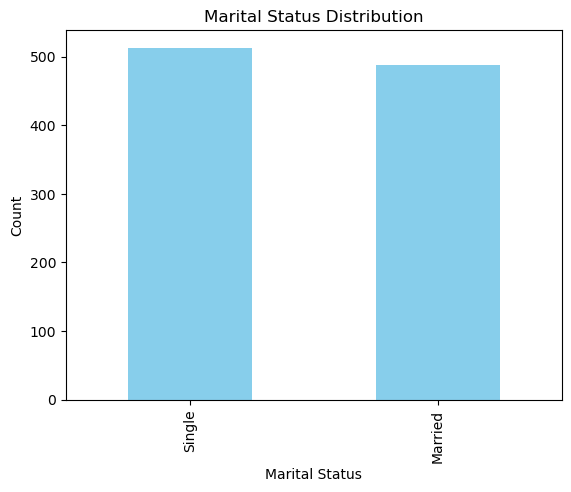

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Assuming 'Marital Status' is the column name
marital_status_distribution = df['Marital Status'].value_counts()

# Plotting the distribution
marital_status_distribution.plot(kind='bar', color='skyblue')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13932\1299669114.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_salary['Salary'] = pd.to_numeric(occupation_salary['Salary'], errors='coerce')


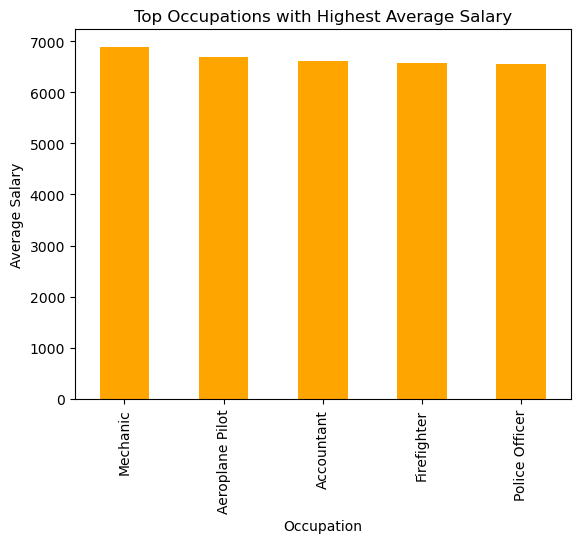

<Figure size 1000x600 with 0 Axes>

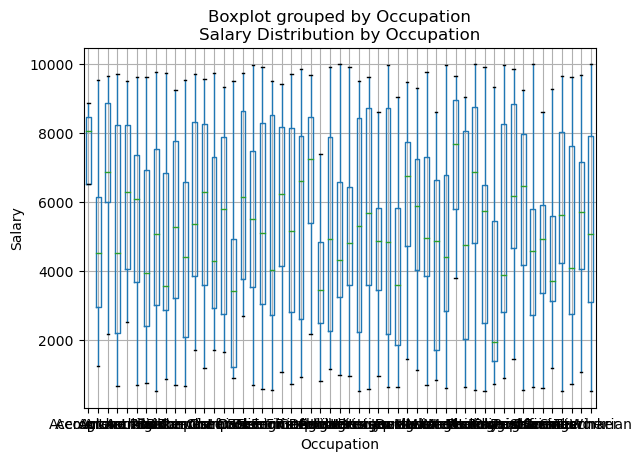

Top Occupations with Highest Average Salary:
Occupation
Mechanic           6884.500000
Aeroplane Pilot    6691.166667
Accountant         6615.000000
Firefighter        6578.600000
Police Officer     6554.866667
Name: Salary, dtype: float64


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def high_salary_occupations(df):
    # Assuming 'Occupation' and 'Salary' are the column names
    occupation_salary = df[['Occupation', 'Salary']]

    # Convert 'Salary' to numeric (assuming it's in a string format)
    occupation_salary['Salary'] = pd.to_numeric(occupation_salary['Salary'], errors='coerce')

    # Group by occupation and calculate the average salary
    avg_salary_by_occupation = occupation_salary.groupby('Occupation')['Salary'].mean()

    # Find the occupations with the highest average salary
    top_occupations = avg_salary_by_occupation.nlargest(5)  # Change 5 to the desired number of top occupations

    # Plot the results for visualization
    top_occupations.plot(kind='bar', color='orange')
    plt.title('Top Occupations with Highest Average Salary')
    plt.xlabel('Occupation')
    plt.ylabel('Average Salary')
    plt.show()

    # Additional Insight: Box plot for salary distribution by occupation
    plt.figure(figsize=(10, 6))
    data.boxplot(column='Salary', by='Occupation', showfliers=False)
    plt.title('Salary Distribution by Occupation')
    plt.xlabel('Occupation')
    plt.ylabel('Salary')
    plt.show()

    return top_occupations



# Call the function
top_occupations = high_salary_occupations(df)

# Display the top occupations with highest average salary
print("Top Occupations with Highest Average Salary:")
print(top_occupations)


In [11]:
df.columns

Index(['First Name', 'Last  Name', 'Gender', 'Age', 'Occupation', 'Salary',
       'Marital Status', 'No. of Children'],
      dtype='object')

In [12]:
gender_distribution = df['Gender'].value_counts()

# 2. Average Age
average_age = df['Age'].mean()

# 3. Most Common Occupations
most_common_occupations = df['Occupation'].mode()

print("1. Distribution of Genders:")
print(gender_distribution)
print("\n2. Average Age of Individuals:", average_age)
print("\n3. Most Common Occupations:")
print(most_common_occupations)

1. Distribution of Genders:
Male      514
Female    486
Name: Gender, dtype: int64

2. Average Age of Individuals: 39.536

3. Most Common Occupations:
0    Insurer
Name: Occupation, dtype: object


In [13]:
"""Age and Occupation Trends:

Are there specific occupations associated with certain age groups?
How does age correlate with the variety of occupations?
"""
# Explore Age and Occupation Trends
age_occupation_trends = df.groupby('Occupation')['Age'].describe()

print("Age and Occupation Trends:")
print(age_occupation_trends)

Age and Occupation Trends:
                   count       mean        std   min    25%   50%    75%   max
Occupation                                                                    
Accountant          13.0  44.538462   9.597008  29.0  40.00  41.0  55.00  58.0
Actor               16.0  33.812500  12.613320  18.0  26.00  29.5  40.50  60.0
Aeroplane Pilot     12.0  38.750000  13.011359  21.0  32.00  37.0  48.75  59.0
Agronomist          24.0  37.166667  12.990521  18.0  27.75  33.5  47.50  60.0
Archeologist        20.0  43.650000  11.476635  21.0  38.50  44.5  50.25  60.0
Architect           22.0  37.181818  11.635890  19.0  28.25  37.0  47.50  54.0
Astronomer          18.0  32.888889  10.197398  18.0  25.50  33.5  39.75  50.0
Auditor             21.0  34.190476  12.584193  19.0  25.00  29.0  48.00  57.0
Baker               17.0  39.294118  14.356030  19.0  29.00  38.0  51.00  60.0
Biochemist          28.0  40.750000  11.577836  21.0  31.75  45.0  48.50  58.0
Botanist            23.0 

In [14]:
# Explore Gender and Family Size
gender_family_size = df.groupby('Gender')['No. of Children'].mean()

print("Gender and Family Size:")
print(gender_family_size)

Gender and Family Size:
Gender
Female    2.436214
Male      2.457198
Name: No. of Children, dtype: float64


In [15]:
# Explore Marital and Professional Balance
marital_occupation_balance = df.groupby('Marital Status')['Occupation'].value_counts()
occupation_child_decision = df.groupby('Occupation')['No. of Children'].mean()
salary_marital_balance = df.groupby('Marital Status')['Salary'].mean()

print("Marital and Professional Balance:")
print(marital_occupation_balance)
print("\nOccupation Influence on Child Decision:")
print(occupation_child_decision)
print("\nSalary Change Based on Marital Status:")
print(salary_marital_balance)

Marital and Professional Balance:
Marital Status  Occupation     
Married         Biochemist         16
                Insurer            16
                Singer             15
                Mechanic           14
                Historian          13
                                   ..
Single          Florist             5
                Police Officer      5
                Aeroplane Pilot     4
                Scientist           4
                Cook                3
Name: Occupation, Length: 106, dtype: int64

Occupation Influence on Child Decision:
Occupation
Accountant           2.769231
Actor                2.187500
Aeroplane Pilot      2.250000
Agronomist           2.583333
Archeologist         1.700000
Architect            2.409091
Astronomer           2.388889
Auditor              1.666667
Baker                3.058824
Biochemist           2.357143
Botanist             2.434783
Carpenter            2.875000
Chef                 2.454545
Chemist              2.142857


In [16]:
# Explore Family Dynamics
married_percentage = (df['Marital Status'] == 'Married').mean() * 100
individuals_with_children = df['No. of Children'].gt(0).sum()
average_children = df['No. of Children'].mean()

print("Married Percentage:", married_percentage, "%")
print("Individuals with Children:", individuals_with_children)
print("Average Number of Children:", average_children)

Married Percentage: 48.699999999999996 %
Individuals with Children: 830
Average Number of Children: 2.447


In [17]:
# Explore Salary and Family Size
salary_children_correlation = df['Salary'].corr(df['No. of Children'])
salary_family_size_patterns = df.groupby('No. of Children')['Salary'].mean()

print("Salary and Number of Children Correlation:", salary_children_correlation)
print("\nSalary Patterns within Different Family Size Groups:")
print(salary_family_size_patterns)

Salary and Number of Children Correlation: 0.0038385776067933323

Salary Patterns within Different Family Size Groups:
No. of Children
0    5161.423529
1    5310.622222
2    5524.388889
3    5183.120482
4    5485.963636
5    5156.515924
Name: Salary, dtype: float64


In [ ]:
df.columns

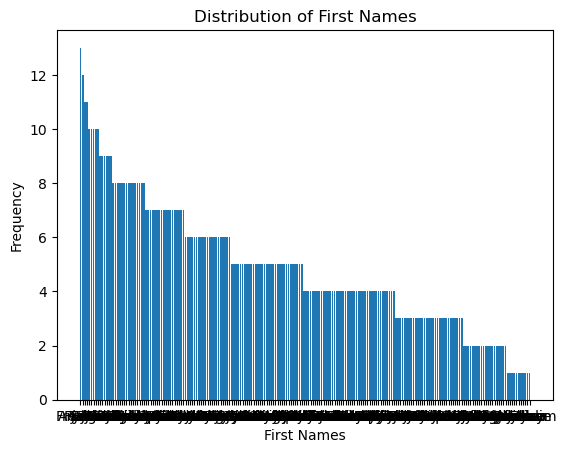

In [19]:
# Extracting data for the 'First Name' column
first_name_counts = df['First Name'].value_counts()

# Plotting the bar chart
plt.bar(first_name_counts.index, first_name_counts.values)
plt.xlabel('First Names')
plt.ylabel('Frequency')
plt.title('Distribution of First Names')
plt.show()

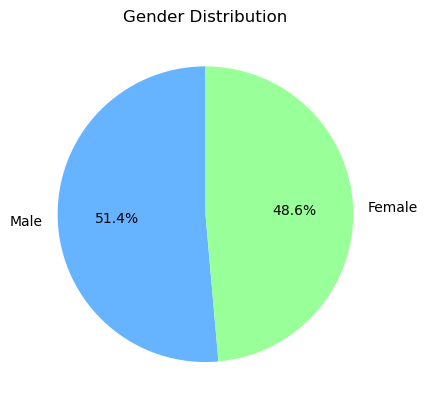

In [20]:
# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Plotting the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Gender Distribution')
plt.show()

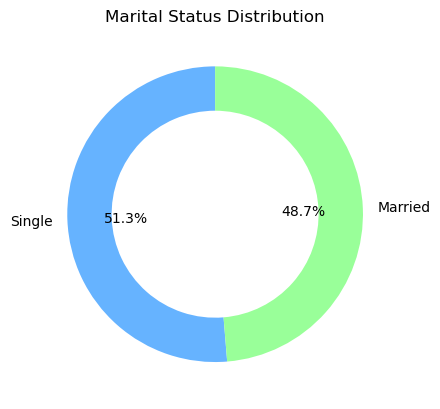

In [21]:
# Count the occurrences of each marital status
marital_status_counts = df['Marital Status'].value_counts()

# Plotting the donut chart
fig, ax = plt.subplots()
ax.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'], wedgeprops=dict(width=0.3))
ax.set_title('Marital Status Distribution')
plt.show()

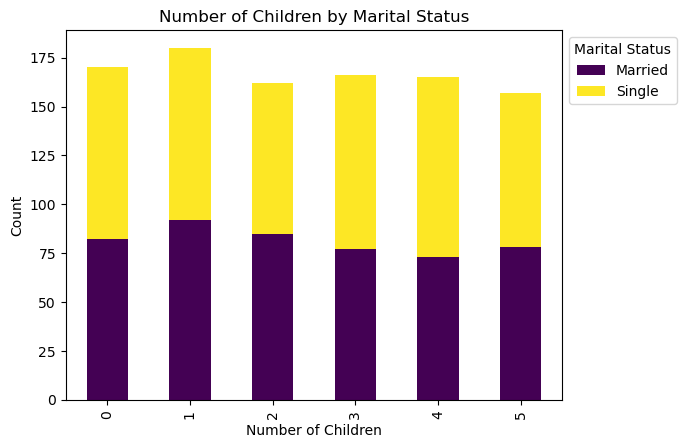

In [22]:
# Create a DataFrame for the counts of No. of Children by Marital Status
children_marital_counts = pd.crosstab(df['No. of Children'], df['Marital Status'])

# Plotting the stacked bar chart
children_marital_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Number of Children by Marital Status')
plt.legend(title='Marital Status', bbox_to_anchor=(1, 1))
plt.show()

In [26]:
# Insight 1: Average Age of Players
average_age = df['Age'].mean()
print(average_age)

39.536


In [30]:
# Insight 2: Distribution of Occupations
occupation_distribution = df['Occupation'].value_counts()
print(occupation_distribution)

Insurer              29
Biochemist           28
Agronomist           24
Driver               24
Programmer           24
Singer               24
Lecturer             23
Electrician          23
Engineer             23
Botanist             23
Architect            22
Producer             22
Historian            22
Interior Designer    22
Chef                 22
Journalist           21
Lawer                21
Auditor              21
Mechanic             20
Interpreter          20
Veterinarian         20
Teacher              20
Salesman             20
Archeologist         20
Medic                19
Pharmacist           19
Fine Artist          19
Meteorologist        19
Geologist            19
Economist            19
Astronomer           18
Social Worker        18
Composer             18
Mathematician        18
Hairdresser          18
Jeweller             17
Physicist            17
Florist              17
Baker                17
Carpenter            16
Actor                16
Photographer    

In [32]:
# Insight 3: Correlation between Salary and Age
sal = df['Salary'].corr(df['Age'])
print(sal)

-0.045306801470057924


In [33]:

# Insight 4: Marital Status Distribution
marita = df['Marital Status'].value_counts()
print(marita)

Single     513
Married    487
Name: Marital Status, dtype: int64


In [36]:

# Insight 5: Average Number of Children
chi = df['No. of Children'].mean()
print(chi)

2.447


In [38]:

# Insight 6: Percentage of Male and Female Players
gen = df['Gender'].value_counts(normalize=True) * 100
print(gen)

Male      51.4
Female    48.6
Name: Gender, dtype: float64


In [40]:

# Insight 7: Most Common First Names
common = df['First Name'].mode()
print(common)

0    Ryan
Name: First Name, dtype: object


In [42]:
df.columns

Index(['First Name', 'Last  Name', 'Gender', 'Age', 'Occupation', 'Salary',
       'Marital Status', 'No. of Children'],
      dtype='object')

In [44]:

# Insight 8: Oldest Player's Last Name
old = df.loc[df['Age'].idxmax(), 'Last  Name']
print(old)

Davis


In [45]:
# Insight 9: Highest Salary Occupation
high = df.loc[df['Salary'].idxmax(), 'Occupation']
print(high)

Graphic Designer


In [46]:
# Insight 10: Marital Status with the Most Children
max_children_marital_status = df.loc[df['No. of Children'].idxmax(), 'Marital Status']
print(max_children_marital_status )

Married


In [47]:
# Insight 11: Average Salary for Married Individuals
average_salary_married = df[df['Marital Status'] == 'Married']['Salary'].mean()
print(average_salary_married)

5233.088295687885


In [48]:
# Insight 12: Female Players with Children
female_players_with_children = df[(df['Gender'] == 'Female') & (df['No. of Children'] > 0)]
print(female_players_with_children)

    First Name  Last  Name  Gender  Age   Occupation  Salary Marital Status  \
1        Grace      Taylor  Female   36      Insurer    4466        Married   
3      Vanessa     Farrell  Female   23        Lawer    3403        Married   
6      Belinda     Spencer  Female   24       Dancer    8927        Married   
11       Tiana      Wright  Female   59     Composer    8087         Single   
12    Kimberly      Rogers  Female   54    Geologist    7929         Single   
..         ...         ...     ...  ...          ...     ...            ...   
989      Lucia      Holmes  Female   33  Firefighter    8618         Single   
990   Adelaide  Montgomery  Female   25      Auditor    5217        Married   
992     Sophia    Ferguson  Female   48    Architect    9636         Single   
995      Alina     Cameron  Female   38      Florist    1432         Single   
998      Rosie     Douglas  Female   21  Hairdresser    5982         Single   

     No. of Children  
1                  1  
3    

In [49]:
# Insight 13: Occupations of Single Players
single_players_occupations = df[df['Marital Status'] == 'Single']['Occupation'].unique()
print(single_players_occupations)

['Aeroplane Pilot' 'Auditor' 'Engineer' 'Composer' 'Geologist' 'Scientist'
 'Economist' 'Mathematician' 'Singer' 'Programmer' 'Lawer' 'Manager'
 'Baker' 'Fine Artist' 'Chef' 'Archeologist' 'Architect' 'Electrician'
 'Photographer' 'Journalist' 'Driver' 'Chemist' 'Lecturer' 'Botanist'
 'Police Officer' 'Astronomer' 'Physicist' 'Florist' 'Salesman'
 'Biochemist' 'Carpenter' 'Fashion Designer' 'Agronomist' 'Interpreter'
 'Veterinarian' 'Historian' 'Actor' 'Graphic Designer' 'Interior Designer'
 'Jeweller' 'Hairdresser' 'Medic' 'Meteorologist' 'Teacher'
 'Social Worker' 'Accountant' 'Firefighter' 'Dancer' 'Insurer' 'Producer'
 'Mechanic' 'Pharmacist' 'Cook']


In [50]:
# Insight 14: Number of Players in Each Age Group
age_groups = pd.cut(df['Age'], bins=[20, 30, 40, 50], labels=['20-30', '30-40', '40-50'])
players_in_age_groups = age_groups.value_counts()
print(age_groups)

0        NaN
1      30-40
2        NaN
3      20-30
4      20-30
       ...  
995    30-40
996    20-30
997    30-40
998    20-30
999      NaN
Name: Age, Length: 1000, dtype: category
Categories (3, object): ['20-30' < '30-40' < '40-50']


In [51]:
print(players_in_age_groups )

40-50    251
20-30    228
30-40    217
Name: Age, dtype: int64


In [53]:
# Insight 15: Salary Quartiles
salary_quartiles = pd.qcut(df['Salary'], q=[0, 0.25, 0.5, 0.75, 1], labels=['Q1', 'Q2', 'Q3', 'Q4'])
print(salary_quartiles)

0      Q3
1      Q2
2      Q3
3      Q2
4      Q1
       ..
995    Q1
996    Q2
997    Q1
998    Q3
999    Q3
Name: Salary, Length: 1000, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']


In [55]:
# Insight 16: Average Salary for Graphic Designer
average_salary_developers = df[df['Occupation'] == 'Graphic Designer']['Salary'].mean()
print(average_salary_developers)

4773.461538461538


In [56]:
# Insight 17: Players without Children
players_without_children = df[df['No. of Children'] == 0]['First Name']
print(players_without_children )

2      Charlie
4       Fenton
10       Alina
21       Tiana
27       Emily
        ...   
988       Anna
991      Rosie
994      Emily
996      Lydia
999     Dexter
Name: First Name, Length: 170, dtype: object


In [57]:
# Insight 18: Average Age of Female Players
average_age_female_players = df[df['Gender'] == 'Female']['Age'].mean()
print(average_age_female_players)

38.86008230452675


In [58]:
# Insight 19: Total Salary Expense
total_salary_expense = df['Salary'].sum()
print(total_salary_expense)

5303460


In [59]:
# Insight 20: Median Age of Married Players
median_age_married_players = df[df['Marital Status'] == 'Married']['Age'].median()
print(median_age_married_players)

41.0


In [60]:
# Insight 21: Average Age of Players by Gender
average_age_by_gender = df.groupby('Gender')['Age'].mean()

# Insight 22: Top 3 Occupations with Highest Salaries
top_3_salaries_by_occupation = df.groupby('Occupation')['Salary'].mean().nlargest(3)

# Insight 23: Distribution of Marital Status by Gender
marital_status_gender_distribution = df.groupby(['Marital Status', 'Gender']).size().unstack()

    # Insight 24: Average Salary of Married Players with Children
average_salary_married_with_children = df[(df['Marital Status'] == 'Married') & (df['No. of Children'] > 0)]['Salary'].mean()

# Insight 25: Age Distribution of Players with Children
age_distribution_with_children = pd.cut(df[df['No. of Children'] > 0]['Age'], bins=[20, 30, 40, 50], labels=['20-30', '30-40', '40-50']).value_counts()


In [61]:
print(average_age_by_gender)

Gender
Female    38.860082
Male      40.175097
Name: Age, dtype: float64


In [62]:
print(top_3_salaries_by_occupation)

Occupation
Mechanic           6884.500000
Aeroplane Pilot    6691.166667
Accountant         6615.000000
Name: Salary, dtype: float64


In [63]:
print(marital_status_gender_distribution)

Gender          Female  Male
Marital Status              
Married            240   247
Single             246   267


In [64]:
print(average_salary_married_with_children)

5197.506172839506


In [65]:
print(age_distribution_with_children)

40-50    210
20-30    195
30-40    182
Name: Age, dtype: int64
